## Metadata Retrieval:

In [1]:
import yaml
import os
import numpy as np

In [13]:
class MetadataRetrieval:
    def __init__(self, directory):
        self.directory = directory
        self.stem_dir = []
        self.mix_name = []
        self.stem_count = []
        self.stems = []
        self.genre = []
        # Open yaml files
        for files in os.listdir(directory):
            if files.split('.')[1] == 'yaml':
                path = directory + '/' + files
            else:
                continue
            with open(path) as yamlfile:
                metadata = yaml.load(yamlfile, Loader=yaml.FullLoader)
            self.mix_name.append(metadata['mix_filename']) # Add file name of mixed song (x values)
            self.genre.append(metadata['genre']) # Genre of song
            self.stem_dir.append(metadata['stem_dir']) # Directory of stems (y values)
            self.stem_count.append(len(metadata['stems'])) # Number of stems/outputs
            dl = []
            # Fix for formatting while iterating through stems
            for i in range(1, len(metadata['stems']) + 1):
                if len(metadata['stems']) >= 10:
                    if i < 10:
                        dl.append(metadata['stems']['S0' + str(i)]['instrument'])
                    else:
                        dl.append(metadata['stems']['S' + str(i)]['instrument'])
                else:
                    dl.append(metadata['stems']['S0' + str(i)]['instrument'])
            self.stems.append(dl) # Add list of stems of song

In [3]:
directory = 'Metadata'
data = MetadataRetrieval(directory)

## Exploratory Data Analysis:

(array([ 32., 162.,  83.,  26.,  15.,   5.,   3.,   2.,   0.,   2.]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ]),
 <a list of 10 Patch objects>)

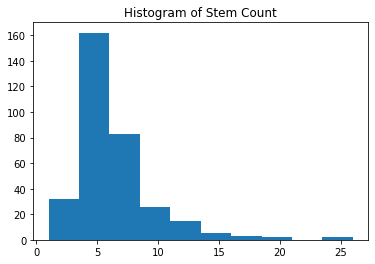

In [8]:
from matplotlib import pyplot as plt

plt.title('Histogram of Stem Count')
plt.hist(np.array(data.stem_count))